<a href="https://colab.research.google.com/github/nikhilbansal23/TelcoRetentionStratergies/blob/main/Telco_Retention_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Data Manipulation**

In [ ]:
path = '/content/drive/MyDrive/Datasets/Telco Retention Strategies/Telco-Customer-Churn.json'

In [ ]:
df = pd.read_json(path)

In [ ]:
df.head(1)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
df.internet[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [ ]:
# Normalize the 'customer_info' column
normalized_cust = pd.json_normalize(df['customer'])
normalized_phone = pd.json_normalize(df['phone'])
normalized_account = pd.json_normalize(df['account'])
normalized_internet = pd.json_normalize(df['internet'])


In [ ]:
# Concatenate the normalized data with the original DataFrame
df = pd.concat([df, normalized_cust,normalized_phone,normalized_account,normalized_internet], axis=1)

# Drop the original 'customer_info' column
df = df.drop(['customer','phone','account','internet'], axis=1)

In [ ]:
df.head(1)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,Yes,Mailed check,65.6,593.3,DSL,No,Yes,No,Yes,Yes,No


In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
print("Telco data count "+str(len(df)))

Telco data count 7267


In [ ]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
# Remove rows with NaN values in the 'Churn' column
df.dropna(subset=['Churn','Charges.Total'], inplace=True)

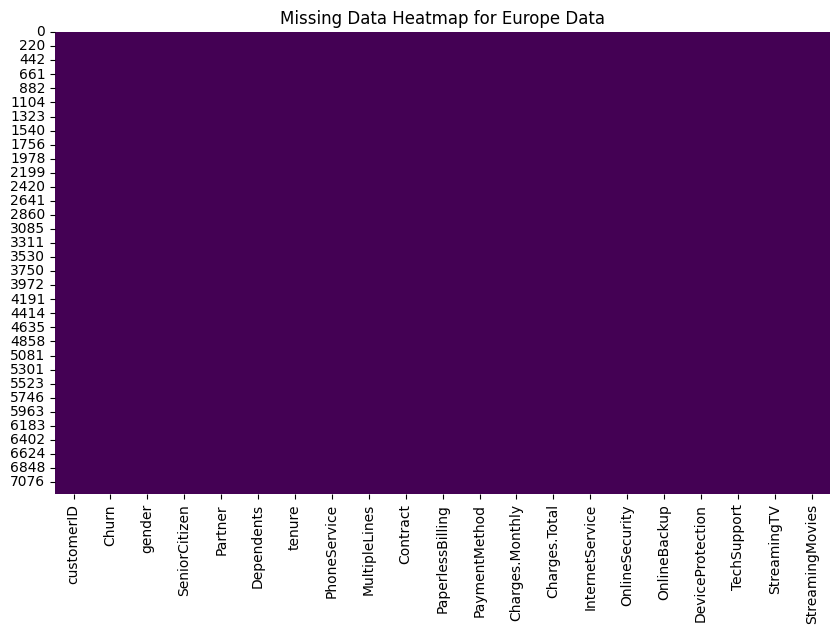

In [ ]:
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap for Europe Data')
plt.show()

In [ ]:
df.rename(columns={'Charges.Monthly': 'Charges_Monthly','Charges.Total':'Charges_Total'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  Charges_Monthly   7032 non-null   float64
 13  Charges_Total     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


# **Exploratory Data Analysis**

In [ ]:
# Count the occurrences of each unique value in the 'Churn' column
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(churn_counts, x='Churn', y='Count', color='Churn',
             labels={'Churn': 'Churn Status', 'Count': 'Count'},
             title='Churn Counts')

# Show the plot
fig.show()

In [ ]:
# Count the occurrences of each unique value in the 'Churn' column
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(gender_counts, x='Gender', y='Count', color='Gender',
             labels={'Gender': 'Gender Status', 'Count': 'Count'},
             title='Gender Counts')

# Show the plot
fig.show()

In [ ]:
# Create a line chart using Plotly Express
fig = px.scatter(df, x='tenure', y='Charges_Monthly', color='gender',
              labels={'tenure': 'Tenure', 'Charges_Monthly': 'Monthly Charges', 'gender': 'Gender'},
              title='Monthly Charges Over Tenure by Gender')

# Show the plot
fig.show()

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(df, x='Churn', y='tenure',
             labels={'Churn': 'Churn Status', 'tenure': 'Tenure'},
             title='Tenure Distribution by Churn')

# Show the plot
fig.show()


In [ ]:
# Create a box plot using Plotly Express
fig = px.box(df, x='Churn', y='Charges_Monthly',
             labels={'Churn': 'Churn Status', 'Charges_Monthly': 'Monthly Charges'},
             title='Monthly Charges by Churn Status')

# Show the plot
fig.show()

In [ ]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [ ]:
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [ ]:
fig = px.histogram(df, x='Charges_Monthly',
                   labels={'Charges_Monthly': 'Monthly Charges', 'count': 'Count'},
                   title='Distribution of Monthly Charges')

# Show the plot
fig.show()


In [ ]:
# Create a scatter plot for TotalCharges
fig = px.scatter(df, x='Charges_Total', y=df.index,
                 labels={'Charges_Total': 'Total Charges', 'y': 'Index'},
                 title='Scatter Plot of Total Charges')

# Show the plot
fig.show()